# Predicting Insurance Premiums

- Our simple dataset contains a few attributes for each person such as
- Age, Sex, BMI, Children, Smoker, Region and their charges

## Aim
- To use this info to predict charges for new customers

In [1]:
import pandas as pd

# Uncomment this line if using this notebook locally
# insurance = pd.read_csv('./data/insurance/insurance.csv')

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance = pd.read_csv(file_name)

# Preview our data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nMissing values :  ", insurance.isnull().sum().values.sum())
print ("\nUnique values :  \n",insurance.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [5]:
insurance.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-6-19691b298dfa>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


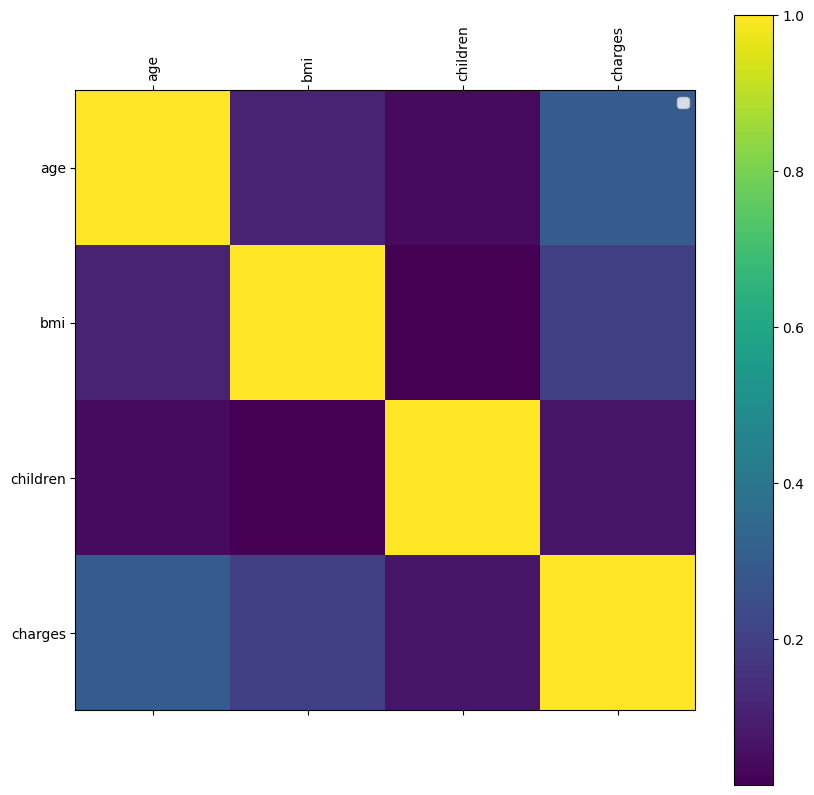

In [6]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(insurance)

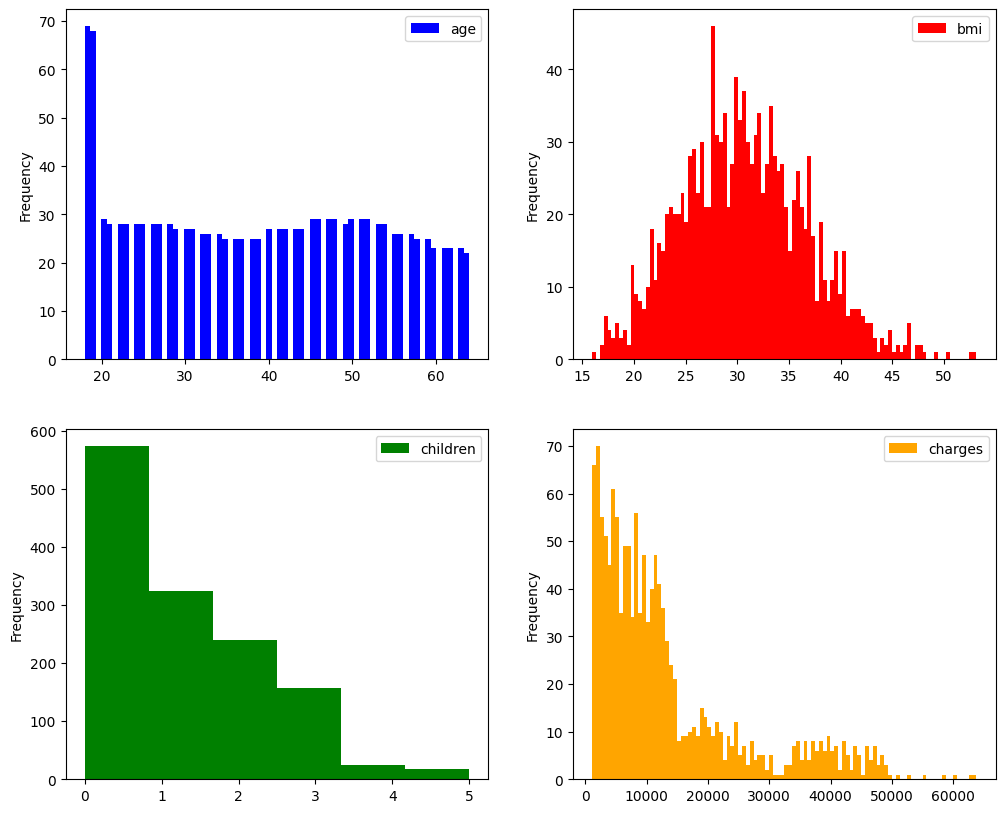

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="charges", bins=100, color="orange", ax=axes[1][1])
plt.show()

<Axes: xlabel='sex'>

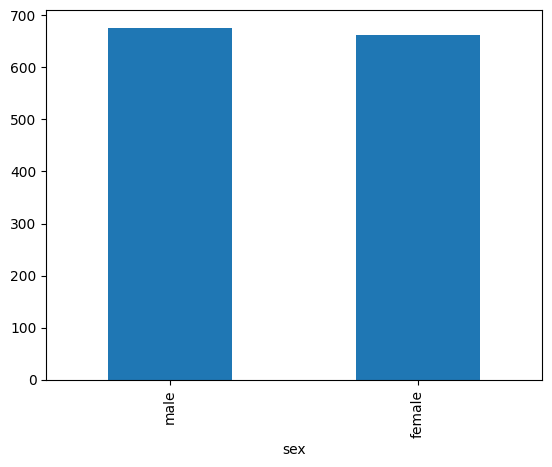

In [8]:
insurance['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

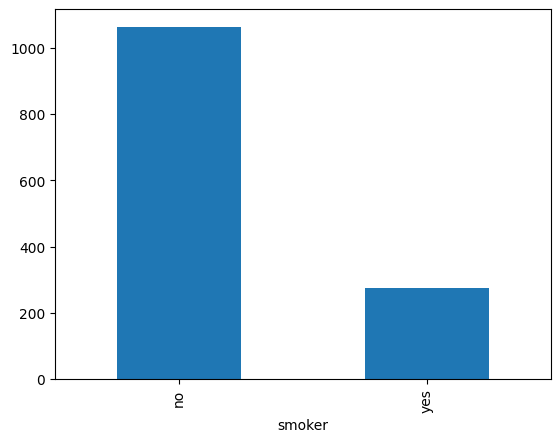

In [9]:
insurance['smoker'].value_counts().plot(kind='bar')

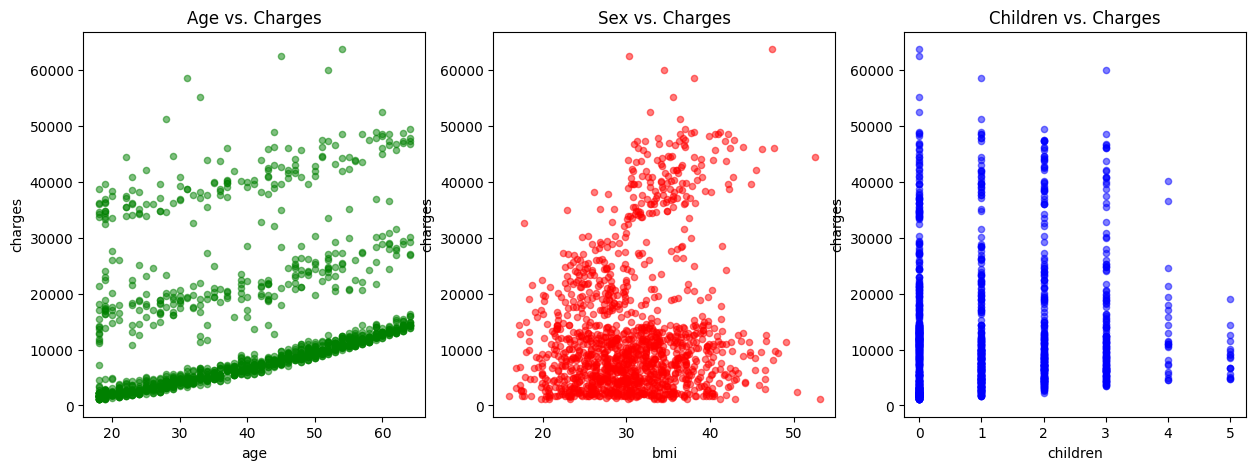

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
insurance.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="Sex vs. Charges")
insurance.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

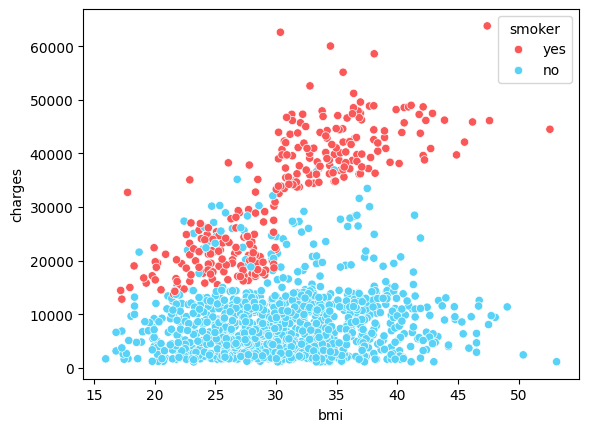

In [11]:
import seaborn as sns  # Imorting Seaborn library
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="bmi", y="charges", data=insurance, palette=pal, hue='smoker')

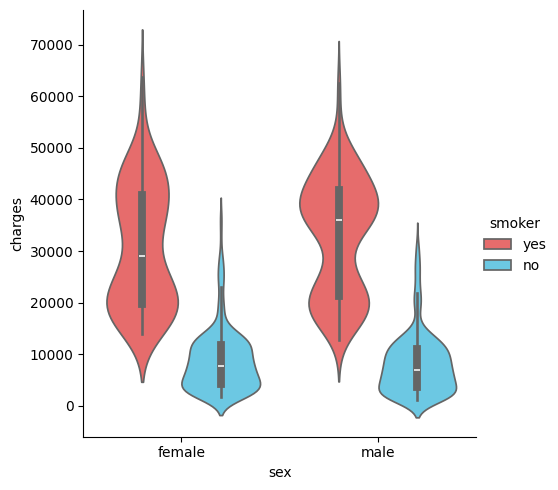

In [12]:
pal = ["#FA5858", "#58D3F7"]
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=insurance, palette = pal)

Text(0.5, 1.0, 'Smokers')

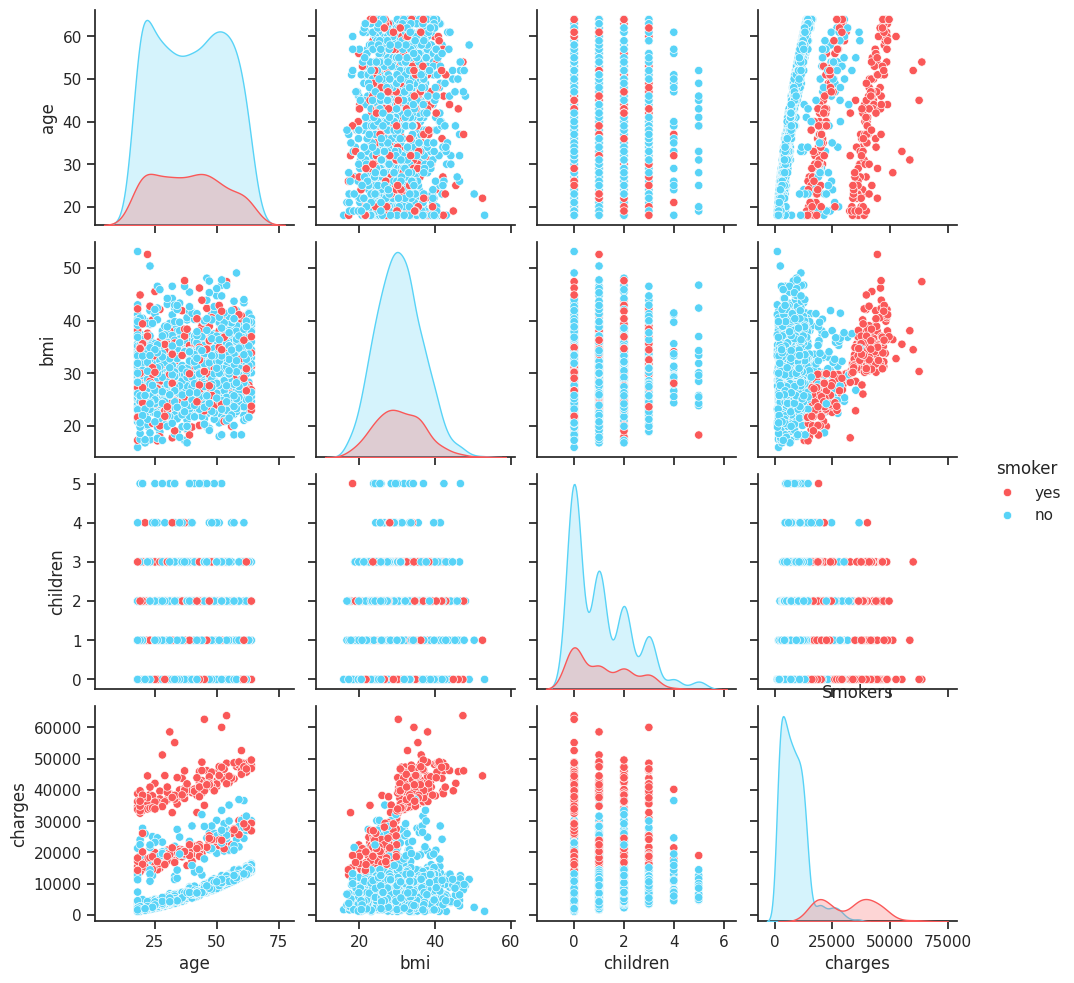

In [13]:
import seaborn as sns

sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")

# Preparing Data for Machine Learning Algorithms

In [14]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
insurance.drop(["region"], axis=1, inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [17]:
# Changing binary categories to 1s and 0s
insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [18]:
X = insurance.drop(['charges'], axis = 1)
y = insurance.charges

# Modeling our Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952171980481992


**Score** is the R2 score, which varies between 0 and 100%. It is closely related to the MSE but not the same.

Wikipedia defines r2 like this, ” … is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

In [20]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53000,11457.247488
610,8547.69130,9925.930740
569,45702.02235,37768.549419
1034,12950.07120,15853.346790
198,9644.25250,6939.119725
...,...,...
574,13224.05705,14429.077741
1174,4433.91590,6705.247131
1327,9377.90470,11152.092298
817,3597.59600,7200.555548


In [21]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.181331,-0.063607,-0.503736
1,1.548746,0.985155,-1.393130,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982242,-0.063607,-0.503736
3,-1.368757,0.985155,-1.011133,-0.892144,1.985167
4,-0.941805,0.985155,-1.362635,-0.892144,-0.503736


In [23]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84210
131,13616.35860
15,1837.23700
1223,26125.67477
1137,3176.28770


In [24]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [25]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [26]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=5, random_state=13)

In [27]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

**NOTE:**
**n_estimators** represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [28]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, gamma='auto', kernel='linear')

In [29]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

### Evaluating Multiple Linear Regression Model

In [30]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.4895607457643889
Testing Accuracy for Multiple Linear Regression Model:  -0.32411020811102875
RMSE for Training Data:  14589.30728329809
RMSE for Testing Data:  14438.166278828226
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.717113419200113


###  Evaluating Polynomial Regression Model

In [31]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8355068796804324
Testing Accuracy for Polynomial Regression Model:  0.8810168906745446
RMSE for Training Data:  4848.187769418564
RMSE for Testing Data:  4328.0535864254625
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8391072917693144


###  Evaluating Decision Tree Regression Model

In [32]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8694256791947466
Testing Accuracy for Decision Tree Regression Model:  0.8711939682763064
RMSE for Training Data:  4319.5096631798915
RMSE for Testing Data:  4503.167201972113
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8494241031595924


### Evaluating Random Forest Regression Model

In [33]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8786315807304423
Testing Accuracy for Random Forest Regression Model:  0.8969061711453914
RMSE for Training Data:  4164.457266795271
RMSE for Testing Data:  4028.7127866662904
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8573788696785247


In [35]:
import numpy as np


In [36]:
# Ensure feature names are consistent
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Function to calculate prediction intervals
def prediction_intervals(model, X, percentile=95):
    predictions = [tree.predict(X) for tree in model.estimators_]
    predictions = np.array(predictions)
    lower_bound = np.percentile(predictions, (100 - percentile) / 2.0, axis=0)
    upper_bound = np.percentile(predictions, 100 - (100 - percentile) / 2.0, axis=0)
    return lower_bound, upper_bound

# Calculate 95% prediction intervals for testing data
lower, upper = prediction_intervals(random_forest_reg, X_test_df, percentile=95)

# Display the results
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_RFR_test,
    "Lower Bound": lower,
    "Upper Bound": upper
})

print(results.head())

# Save the results to a CSV file
results.to_csv("insurance_predictions_with_intervals.csv", index=False)
print("Prediction intervals saved to insurance_predictions_with_intervals.csv")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWa

           Actual     Predicted   Lower Bound   Upper Bound
578    9724.53000  12361.115921  10158.677556  17298.013405
610    8547.69130  10964.538287   8283.974322  13622.473615
569   45702.02235  44801.313421  41216.685535  47893.971221
1034  12950.07120  14000.362289  12256.354121  15726.061159
198    9644.25250  11064.521864   8508.106531  13621.474641
Prediction intervals saved to insurance_predictions_with_intervals.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWa

### Evaluating Support Vector Regression Model

In [37]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.6522181188487585
Testing Accuracy for Support Vector Regression Model:  0.7343173561601355
RMSE for Training Data:  7049.511742429949
RMSE for Testing Data:  6467.427432129576
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.7058131221977515


In [38]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies,
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.489561,-0.324110,14589.307283,14438.166279,0.717113
Polynomial Regression,fit_intercept=False,0.835507,0.881017,4848.187769,4328.053586,0.839107
Decision Tree Regression,max_depth=5,0.869426,0.871194,4319.509663,4503.167202,0.849424
Random Forest Regression,"n_estimators=400, max_depth=5",0.878632,0.896906,4164.457267,4028.712787,0.857379
Support Vector Regression,"kernel=”linear”, C=1000",0.652218,0.734317,7049.511742,6467.427432,0.705813


### Our best classifier is our Random Forests using 400 estimators and a max_depth of 5

**R^2 (coefficient of determination) regression score function.**

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

# Let's test our best regression on some new data

In [39]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [40]:
# Our simple pre-processing
input_data.drop(["region"], axis=1, inplace=True)
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [41]:
# Scale our input data
input_data = sc.transform(input_data)
input_data

array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [42]:
# Reshape our input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [43]:
# Get our predicted insurance rate for our new customer
random_forest_reg.predict(input_data)

array([5961.85333748])

In [44]:
# Note Standard Scaler remembers your inputs so you can use it still here
print(sc.mean_)
print(sc.scale_)

[39.23529412  0.50747757 30.7197657   1.07676969  0.20239282]
[14.05311355  0.49994408  6.23040428  1.20694597  0.40178348]


In [45]:
insurance = insurance.drop_duplicates()

In [46]:
#stacking ensemble:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the data
url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
data = pd.get_dummies(data, drop_first=True)
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Define base learners
base_learners = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define meta learner
meta_learner = LinearRegression()

# Define stacking ensemble
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Train the model
stacking_model.fit(X_train, y_train)

# Save the stacking model
joblib.dump(stacking_model, "stacking_model.pkl")

# Make predictions on training and testing sets
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy_SR_train = r2_score(y_train, y_train_pred)
accuracy_SR_test = r2_score(y_test, y_test_pred)
RMSE_SR_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_SR_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
accuracy_cv_SR = cross_val_score(stacking_model, X, y, cv=10, scoring='r2')

# Print the results
print("Parameters:")
print(f"Base Learners: {base_learners}")
print(f"Meta Learner: {meta_learner}")
print(f"Training Accuracy (R^2): {accuracy_SR_test}")
print(f"Testing Accuracy (R^2): {accuracy_SR_test}")
print(f"Training RMSE: {RMSE_SR_train}")
print(f"Testing RMSE: {RMSE_SR_test}")
print(f"10-Fold Score: {accuracy_cv_SR.mean()}")


#testing on new data:

import pandas as pd
import numpy as np
import joblib

# Load the input data
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}
input_data = pd.DataFrame(input_data)

# Preprocess the input data (assuming same preprocessing steps)
input_data = pd.get_dummies(input_data, drop_first=True)

# Ensure the input data has the same columns as the training data
X_train_columns = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
missing_cols = set(X_train_columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0
input_data = input_data[X_train_columns]

# Load the scaler
scaler = joblib.load("scaler.pkl")

# Standardize the input data
input_data_scaled = scaler.transform(input_data)

# Reshape our input data in the format required by sklearn models
input_data_scaled = input_data_scaled.reshape(1, -1)
print(input_data_scaled.shape)

# Load the trained stacking ensemble model
stacking_model = joblib.load("stacking_model.pkl")

# Get our predicted insurance rate for our new customer
predicted_charges = stacking_model.predict(input_data_scaled)
print(f"Predicted charges for the input data: {predicted_charges[0]}")

# Note Standard Scaler remembers your inputs so you can use it still here
print("Mean used by StandardScaler:", scaler.mean_)
print("Scale used by StandardScaler:", scaler.scale_)


Parameters:
Base Learners: [('lr', LinearRegression()), ('dt', DecisionTreeRegressor(random_state=42)), ('rf', RandomForestRegressor(random_state=42))]
Meta Learner: LinearRegression()
Training Accuracy (R^2): 0.8720802546259503
Testing Accuracy (R^2): 0.8720802546259503
Training RMSE: 2668.9642604246683
Testing RMSE: 4456.386226761757
10-Fold Score: 0.8407366852773418
(1, 8)
Predicted charges for the input data: 5104.908846669077
Mean used by StandardScaler: [39.35700935 30.5603972   1.10747664  0.51214953  0.20560748  0.23925234
  0.26448598  0.24672897]
Scale used by StandardScaler: [14.06738199  6.040561    1.21541508  0.49985237  0.40414483  0.42662707
  0.44105912  0.43110763]


In [47]:
from sklearn.linear_model import BayesianRidge


bayesian_reg = BayesianRidge(max_iter=500)
bayesian_reg.fit(X_train, y_train)

# Prediction with training dataset:
y_pred_BR_train = bayesian_reg.predict(X_train)


# Prediction with testing dataset:
y_pred_BR_test = bayesian_reg.predict(X_test)


# Find training accuracy for this model:
accuracy_BR_train = r2_score(y_train, y_pred_BR_train)
print("Training Accuracy for Bayesian Regression Model: ", accuracy_BR_train)


# Find testing accuracy for this model:
accuracy_BR_test = r2_score(y_test, y_pred_BR_test)
print("Testing Accuracy for Bayesian Regression Model: ", accuracy_BR_test)


# Find RMSE for training data:
RMSE_BR_train = sqrt(mean_squared_error(y_train, y_pred_BR_train))
print("RMSE for Training Data: ", RMSE_BR_train)


# Find RMSE for testing data:
RMSE_BR_test = sqrt(mean_squared_error(y_test, y_pred_BR_test))
print("RMSE for Testing Data: ", RMSE_BR_test)


# Prediction with 10-Fold Cross Validation:
y_pred_cv_BR = cross_val_predict(bayesian_reg, X, y, cv=10)


# Find accuracy after 10-Fold Cross Validation
accuracy_cv_BR = r2_score(y, y_pred_cv_BR)
print("Accuracy for 10-Fold Cross Predicted Bayesian Regression Model: ", accuracy_cv_BR)

# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train, accuracy_BR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test, accuracy_BR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train, RMSE_BR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test, RMSE_BR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR, accuracy_cv_BR]


parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000", "max_iter=500"]


table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies,
             "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression", "Bayesian Regression"]

#testing bayesian:

bayesian_reg.predict(input_data)

Training Accuracy for Bayesian Regression Model:  0.7417203882765029
Testing Accuracy for Bayesian Regression Model:  0.7834467350138165
RMSE for Training Data:  6105.606589974451
RMSE for Testing Data:  5798.242810499306
Accuracy for 10-Fold Cross Predicted Bayesian Regression Model:  0.7475804718327597


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


array([192329.25480064])

**Gradient**


Gradient Boosting Regressor Performance:
Training R²: 0.889799
Testing R²: 0.881161
Cross-validation R²: 0.858543
Training RMSE: 3988.198142
Testing RMSE: 4295.297085
Training MAE: 2215.994125
Testing MAE: 2450.589116
Training MAPE: 27.884708%
Testing MAPE: 33.915626%


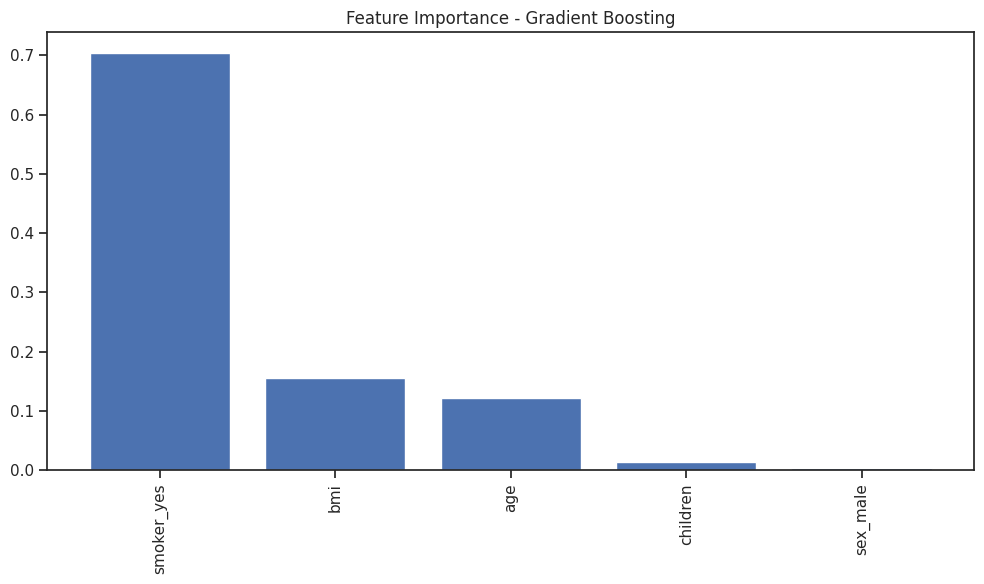

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load the dataset
insurance_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

# Prepare data for modeling - excluding 'region'
X = insurance_data.drop(['charges', 'region'], axis=1)
y = insurance_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['sex', 'smoker']
numerical_features = ['age', 'bmi', 'children']

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create an optimized Gradient Boosting model
gb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.01,
        max_depth=4,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        subsample=0.8,
        random_state=42))
])

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Cross-validation score
cv_r2 = np.mean(cross_val_score(gb_model, X, y, cv=10, scoring='r2'))

# Print results
print(f"Gradient Boosting Regressor Performance:")
print(f"Training R²: {train_r2:.6f}")
print(f"Testing R²: {test_r2:.6f}")
print(f"Cross-validation R²: {cv_r2:.6f}")
print(f"Training RMSE: {train_rmse:.6f}")
print(f"Testing RMSE: {test_rmse:.6f}")
print(f"Training MAE: {train_mae:.6f}")
print(f"Testing MAE: {test_mae:.6f}")
print(f"Training MAPE: {train_mape:.6f}%")
print(f"Testing MAPE: {test_mape:.6f}%")

# Feature importance
feature_names = (numerical_features +
                 gb_model.named_steps['preprocessor']
                 .transformers_[1][1]
                 .get_feature_names_out(categorical_features).tolist())

importances = gb_model.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Gradient Boosting')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [49]:
#test gradient
input_data = {
    'age': [35],
    'sex': ['male'],
    'bmi': [26],
    'children': [0],
    'smoker': ['no'],
    'region': ['southeast']
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)
print("Original input data:")
print(input_df)

# Drop the 'region' column since our model doesn't use it
input_df = input_df.drop('region', axis=1)
print("\nInput data after dropping 'region':")
print(input_df)

# Make prediction using the pipeline
prediction = gb_model.predict(input_df)
print(f"\nPredicted insurance charges: ${prediction[0]:.2f}")

Original input data:
   age   sex  bmi  children smoker     region
0   35  male   26         0     no  southeast

Input data after dropping 'region':
   age   sex  bmi  children smoker
0   35  male   26         0     no

Predicted insurance charges: $4041.00


In [52]:
# Assuming you've already calculated these metrics for Gradient Boosting:
accuracy_GBR_train = train_r2  # From your GBR model
accuracy_GBR_test = test_r2
RMSE_GBR_train = train_rmse
RMSE_GBR_test = test_rmse
accuracy_cv_GBR = cv_r2

# Update the lists with GBR metrics
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train, accuracy_BR_train, accuracy_SR_train, accuracy_GBR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test, accuracy_BR_test, accuracy_SR_test, accuracy_GBR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train, RMSE_BR_train, RMSE_SR_train, RMSE_GBR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test, RMSE_BR_test, RMSE_SR_test, RMSE_GBR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR, accuracy_cv_BR, accuracy_cv_SR, accuracy_cv_GBR]

# Update parameters list with GBR parameters
parameters = ["fit_intercept=False",
              "fit_intercept=False",
              "max_depth=5",
              "n_estimators=400, max_depth=5",
              "kernel='linear', C=1000",
              "max_iter=500",
              "estimators=base_learners, final_estimator=meta_learner",
              "n_estimators=500, learning_rate=0.01, max_depth=4, subsample=0.8"]

# Update table data
table_data = {"Parameters": parameters,
              "Training Accuracy": training_accuracies,
              "Testing Accuracy": testing_accuracies,
              "Training RMSE": training_RMSE,
              "Testing RMSE": testing_RMSE,
              "10-Fold Score": cv_accuracies}

# Update model names
model_names = ["Multiple Linear Regression",
               "Polynomial Regression",
               "Decision Tree Regression",
               "Random Forest Regression",
               "Support Vector Regression",
               "Bayesian Regression",
               "Stacking Ensemble Regression",
               "Gradient Boosting Regression"]

# Create and display the updated table
table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe


,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.489561,-0.324110,14589.307283,14438.166279,0.717113
Polynomial Regression,fit_intercept=False,0.835507,0.881017,4848.187769,4328.053586,0.839107
Decision Tree Regression,max_depth=5,0.869426,0.871194,4319.509663,4503.167202,0.849424
Random Forest Regression,"n_estimators=400, max_depth=5",0.878632,0.896906,4164.457267,4028.712787,0.857379
Support Vector Regression,"kernel='linear', C=1000",0.652218,0.734317,7049.511742,6467.427432,0.705813
Bayesian Regression,max_iter=500,0.741720,0.783447,6105.606590,5798.242810,0.74758
Stacking Ensemble Regression,"estimators=base_learners, final_estimator=meta...",0.950646,0.872080,2668.964260,4456.386227,"[0.8737037248341791, 0.8438225391500072, 0.823..."
Gradient Boosting Regression,"n_estimators=500, learning_rate=0.01, max_dept...",0.889799,0.881161,3988.198142,4295.297085,0.858543


**Prediction Interval**